### **Exercise1:**

Create a class Person that represents a person and has the following attributes:

 - first_name: The first name of the person.
 - last_name: The last name of the person.
 - age: The age of the person.

And the following methods:

 - full_name: Returns the full name of the person, which is the combination of their first and last name.
 - is_adult: Returns True if the person is 18 years or older, and False otherwise.


In [13]:
class person():
  def __init__(self, first_name:str, last_name:str, age: int):
    self.f_name = first_name
    self.l_name = last_name
    self.age = age
  def full_name(self) -> str:
    return self.f_name+' '+self.l_name
  def is_adult(self) -> bool:
    return bool(self.age>=18)

lis=person('Luis', 'Smith', 18.1)
lis.full_name()
lis.is_adult()

True

### **Exercise2:**

Create your own class for complex numbers. Make sure all the arithmetic operations work and that you can print it. 

In [29]:
class complexn():
  def __init__(self, real_part, imaginary_part):
    self.re = real_part
    self.im = imaginary_part
    
  def __add__(self,other):   
    re = self.re+other.re
    im = self.im+other.im
    return complexn(re,im)
  
  def __mul__(self,other):
    re = self.re*other.re - self.im*other.im
    im = self.re*other.im + self.im*other.re
    return complexn(re,im)
  
  def __div__(self,other):
    re = (self.re*other.re + self.im*other.im)/(other.re**2+other.im**2)
    im = (self.im*other.re - self.re*other.im)/(other.re**2+other.im**2)
    return complexn(re,im)
  
  def __truediv__(self,other):
    if type(other)==type(5):
      other = complexn(other,0)
    re = (self.re*other.re + self.im*other.im)/(other.re**2+other.im**2)
    im = (self.im*other.re - self.re*other.im)/(other.re**2+other.im**2)
    return complexn(re,im)
  
  def __rtruediv__(self,other):
    if type(other)==type(5):
      other = complexn(other,0)
    re = (other.re*self.re + other.im*self.im)/(self.re**2+self.im**2)
    im = (other.im*self.re - other.re*self.im)/(self.re**2+self.im**2)
    return complexn(re,im)

    
  def __str__(self):
    if self.im < 0 :
      return "{0}{1}j".format(self.re, self.im)
    else:
      return "{0}+{1}j".format(self.re, self.im)
    
a = complexn(0,1)
b = complexn(0,1)
print(-5/b)

0.0+5.0j


### **Exercise3:**

Create a "wrapper class" for around numpy array for operations on matrices. You should be able to execute the following code:

```
N=4
matrix1=MyMatrix(N) #creates a square matrix
matrix2=MyMatrix(N)
print(matrix1.inverse())
print(matrix1.determinant())
print(matrix1.eigenvalues())
print(matrix1+matrix2)
print(matrix1*matrix2)
```

In [38]:
import numpy as np

class MyMatrix:
    def __init__(self, N):
      self.matrix = np.random.rand(N, N)        
    def inverse(self):
        return np.linalg.inv(self.matrix)
    
    def determinant(self):
        return np.linalg.det(self.matrix)
    
    def eigenvalues(self):
        return np.linalg.eigvals(self.matrix)
    
    def __add__(self, other):
        return np.add(self.matrix,other.matrix)
    
    def __mul__(self, other):
        return np.multiply(self.matrix, other.matrix)
    
    def __repr__(self):
        return str(self.matrix)

a=MyMatrix(4)
b=MyMatrix(4)


### **Exercise4:**

Write a class to "solve" the exercise 3 of "exercises6". You should be able to execute the following code:

```
solution=Exercise4()
int1=solution.integrate_scipy()
int2=solution.integrate_simpy()
print(int1)
print(int2)
solution.display()
```

666.6666666666667
2000/3


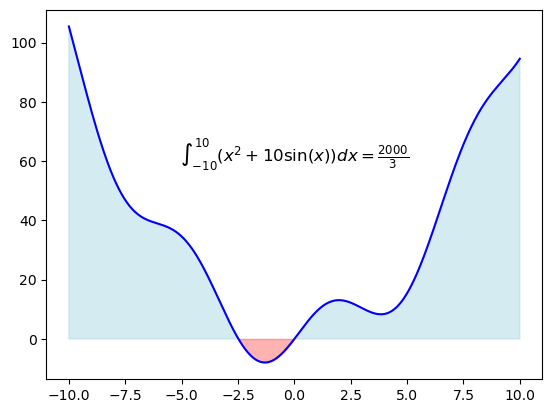

In [5]:
from scipy.integrate import quad
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

class Exercise4():
  def __init__(self):
    pass  
  
  def integrate_scipy(self):
    integral, error = quad(lambda x: x**2 + 10*np.sin(x), -10, 10)
    return integral

  def integrate_simpy(self):
    x = sym.Symbol('x')
    expr = x**2 + 10*sym.sin(x)
    integral = sym.integrate(expr, (x, -10, 10))
    return integral

  def display(self):
    x = np.linspace(-10, 10, num=500)
    y = x**2 + 10*np.sin(x)

    fig, ax = plt.subplots()
    ax.fill_between(x, y, 0, where=(y > 0), color='lightblue', alpha=0.5)
    ax.fill_between(x, y, 0, where=(y < 0), color='red', alpha=0.3)
    ax.plot(x, y, '-b')
    
    integral_text = r"$\int_{-10}^{10} (x^2 + 10\sin(x)) dx = %s$"%(sym.latex(self.integrate_simpy()))
    plt.text(0, 60, integral_text, fontsize=12, ha='center')
    plt.show()

solution = Exercise4()
int1=solution.integrate_scipy()
int2=solution.integrate_simpy()
print(int1)
print(int2)
solution.display()
